In [5]:
doc1 = "Hiking is a long, vigorous walk, usually on trails or footpaths in the countryside. Hiking is the preferred term in Canada and the United States; the term walking is used in these regions for shorter, particularly urban walks."
doc2 = "The term bushwalking is endemic to Australia, having been adopted by the Sydney Bush Walkers club in 1927"
doc3 = "Fashion is a popular aesthetic expression at a particular time and place and in a specific context, especially in clothing, footwear, lifestyle, accessories, makeup, hairstyle, and body proportions."

docs = [doc1,doc2,doc3]

In [2]:
!pip3 install WordCloud

    100% |████████████████████████████████| 368kB 970kB/s ta 0:00:01
    100% |████████████████████████████████| 11.5MB 71kB/s eta 0:00:01
    100% |████████████████████████████████| 2.2MB 332kB/s ta 0:00:01
    100% |████████████████████████████████| 13.4MB 66kB/s eta 0:00:01   19% |██████▍                         | 2.7MB 1.3MB/s eta 0:00:08    47% |███████████████▏                | 6.3MB 962kB/s eta 0:00:08    86% |███████████████████████████▋    | 11.5MB 827kB/s eta 0:00:03
  Using cached https://files.pythonhosted.org/packages/8a/bb/488841f56197b13700afd5658fc279a2025a39e22449b7cf29864669b15d/pyparsing-2.4.7-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/f7/d2/e07d3ebb2bd7af696440ce7e754c59dd546ffe1bbe732c8ab68b9c834e61/cycler-0.10.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/ae/23/147de658aabbf968324551ea22c0c13a00284c4ef49a77002e91f79657b7/kiwisolver-1.2.0-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.p

In [3]:
from wordcloud import WordCloud

In [6]:
long_string = ",".join(docs)
wordcloud = WordCloud(background_color="white")
wordcloud.generate(long_string)

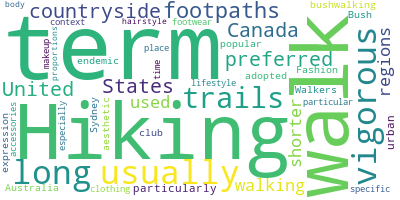

In [7]:
wordcloud.to_image()

In [8]:
import pandas as pd

In [9]:
people = pd.read_csv('people_data.csv',nrows=5000)

In [10]:
people.fillna("No Data", inplace =True)

In [11]:
people.head()

,URI,name,text
0,<http://dbpedia.org/resource/Bill_Clinton>,Bill Clinton,william jefferson bill clinton born william je...
1,<http://dbpedia.org/resource/Polyana_L%C3%B3pez>,Polyana L%C3%B3pez,polyana lpez born circa 1985 is an argentine a...
2,<http://dbpedia.org/resource/Harpdog_Brown>,Harpdog Brown,harpdog brown is a singer and harmonica player...
3,<http://dbpedia.org/resource/Franz_Rottensteiner>,Franz Rottensteiner,franz rottensteiner born in waidmannsfeld lowe...
4,<http://dbpedia.org/resource/G-Enka>,G-Enka,henry krvits born 30 december 1974 in tallinn ...


In [12]:
long_string = ",".join(list(people['text'].values))

In [13]:
wordcloud.generate(long_string)

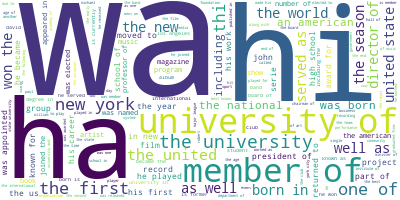

In [14]:
wordcloud.to_image()

# Topic Modelling

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [2]:
computer = """nformation and computer science (ICS) or computer and information science (CIS) (plural forms, i.e., sciences, may also be used) is a field that emphasizes both computing and information science and engineering, upholding the strong association between the fields of information sciences and computer sciences and treating computers as a tool rather than a field. ICS in Europe is called informatics.

Information science is one with a long history, unlike the relatively very young field of computer science, and is primarily concerned with gathering, storing, disseminating, sharing and protecting any and all forms of information. It is a broad field, covering a myriad of different areas but is often referenced alongside computer science because of the incredibly useful nature of computers and computer programs in helping those studying and doing research in the field – particularly in helping to analyse data[1] and in spotting patterns too broad for a human to intuitively perceive. While information science is sometimes confused with information theory, the two have vastly different subject matter. Information theory focuses on one particular mathematical concept of information while information science is focused on all aspects of the processes and techniques of information.

Computer science, in contrast, is less focused on information and its different states, but more, in a very broad sense, on the use of computers – both in theory and practice – to design and implement algorithms in order to aid the processing of information during the different states described above. It has strong foundations in the field of mathematics, as the very first recognised practitioners of the field were renowned mathematicians such as Alan Turing.

Information science and computing began to converge in the 1950s and 1960s, as information scientists started to realize the many ways computers would improve information storage and retrieval."""

food = """Pizza (Italian: [ˈpittsa], Neapolitan: [ˈpittsə]) is a savory dish of Italian origin consisting of a usually round, flattened base of leavened wheat-based dough topped with tomatoes, cheese, and often various other ingredients (such as anchovies, mushrooms, onions, olives, pineapple, meat, etc.) which is then baked at a high temperature, traditionally in a wood-fired oven.[1] A small pizza is sometimes called a pizzetta. A person who makes pizza is known as a pizzaiolo.

In Italy, pizza served in formal settings, such as at a restaurant, is presented unsliced, and is eaten with the use of a knife and fork.[2][3] In casual settings, however, it is cut into wedges to be eaten while held in the hand.

The term pizza was first recorded in the 10th century in a Latin manuscript from the Southern Italian town of Gaeta in Lazio, on the border with Campania.[4] Modern pizza was invented in Naples, and the dish and its variants have since become popular in many countries.[5] It has become one of the most popular foods in the world and a common fast food item in Europe and North America, available at pizzerias (restaurants specializing in pizza), restaurants offering Mediterranean cuisine, and via pizza delivery.[5][6] Many companies sell ready-baked frozen pizzas to be reheated in an ordinary home oven.

The Associazione Verace Pizza Napoletana (lit. True Neapolitan Pizza Association) is a non-profit organization founded in 1984 with headquarters in Naples that aims to promote traditional Neapolitan pizza.[7] In 2009, upon Italy's request, Neapolitan pizza was registered with the European Union as a Traditional Speciality Guaranteed dish,[8][9] and in 2017 the art of its making was included on UNESCO's list of intangible cultural heritage.[10]"""

In [3]:
doc_complete = [computer, food]

In [28]:
number_topics = 2
#tfidf
tf = TfidfVectorizer(stop_words="english", ngram_range=(1,3))
tf_data = tf.fit_transform(doc_complete)


#lda
lda = LatentDirichletAllocation(n_components = number_topics)
lda.fit(tf_data)

LatentDirichletAllocation(n_components=2)

In [29]:
lda.components_.shape

(2, 848)

In [30]:
tf_data.shape

(2, 848)

In [31]:
tf.get_feature_names()

['10',
 '10th',
 '10th century',
 '10th century latin',
 '1950s',
 '1950s 1960s',
 '1950s 1960s information',
 '1960s',
 '1960s information',
 '1960s information scientists',
 '1984',
 '1984 headquarters',
 '1984 headquarters naples',
 '2009',
 '2009 italy',
 '2009 italy request',
 '2017',
 '2017 art',
 '2017 art making',
 'aid',
 'aid processing',
 'aid processing information',
 'aims',
 'aims promote',
 'aims promote traditional',
 'alan',
 'alan turing',
 'alan turing information',
 'algorithms',
 'algorithms order',
 'algorithms order aid',
 'alongside',
 'alongside computer',
 'alongside computer science',
 'america',
 'america available',
 'america available pizzerias',
 'analyse',
 'analyse data',
 'analyse data spotting',
 'anchovies',
 'anchovies mushrooms',
 'anchovies mushrooms onions',
 'areas',
 'areas referenced',
 'areas referenced alongside',
 'art',
 'art making',
 'art making included',
 'aspects',
 'aspects processes',
 'aspects processes techniques',
 'association',

In [32]:
# providing score for each and every feature
lda.components_

array([[0.53831479, 0.53831479, 0.53831479, ..., 0.53831479, 0.53831479,
        0.53831479],
       [0.5007577 , 0.5007577 , 0.5007577 , ..., 0.5007577 , 0.5007577 ,
        0.5007577 ]])

In [33]:
# argsort gives the index of score in ascedding order
lda.components_[0].argsort()

array([720, 711, 712, 713, 714, 715, 716, 718, 719, 281, 280, 279, 278,
       277, 276, 275, 601, 721, 722, 723, 724, 725, 291, 292, 293, 602,
       465, 466, 318, 317, 316, 467, 611, 696, 697, 698, 726, 310, 308,
       307, 610, 609, 608, 607, 606, 475, 476, 477, 309, 728, 729, 730,
       235, 234, 233, 232, 231, 738, 739, 740, 600, 596, 236, 441, 218,
       217, 216, 215, 214, 213, 595, 748, 749, 750, 220, 322, 237, 239,
       731, 261, 260, 259, 258, 257, 256, 255, 732, 733, 238, 734, 736,
       737, 247, 246, 245, 244, 243, 242, 241, 240, 735, 751, 323, 326,
       652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663, 664,
       665, 666, 667, 668, 669, 670, 671, 673, 456, 455, 454, 644, 440,
       439, 438, 437, 436, 435, 434, 433, 432, 431, 674, 430, 633, 634,
       635, 627, 626, 625, 624, 420, 419, 418, 628, 675, 676, 677, 353,
       352, 349, 348, 347, 346, 344, 343, 342, 341, 355, 340, 687, 335,
       334, 333, 332, 331, 330, 329, 328, 327, 339, 324, 356, 35

In [34]:
#now extract last 5 index as they have more scores that is they are important features and put it in descending order

lda.components_[0].argsort()[-5:][::-1]

array([528, 468, 192, 382, 469])

In [35]:
# extract import topic

all_features = tf.get_feature_names()

for each in lda.components_:
    index = each.argsort()[-1:][::-1]
    topic = ""
    for i in index:
        topic = topic + " " +all_features[i]
    
    print(topic)


 pizza
 information
